# Sketchbook for NLP Project

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import prepare
import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=15)

from wordcloud import WordCloud

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/a666/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Acquire

In [3]:
df = pd.read_json('data.json')
df

,repo,language,readme_contents
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...
3,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...
4,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...
...,...,...,...
197,andyxialm/CutoLoadingView,Java,#CutoLoadingView\n[![](https://jitpack.io/v/an...
198,rjsvieira/morphos,Java,# Morphos\n\n![Current Version](https://img.sh...
199,tuesda/SubmitDemo,Java,This is library project with a custom view tha...
200,avenwu/support,Java,Support\n========\n\nCustom Android support li...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             202 non-null    object
 1   language         191 non-null    object
 2   readme_contents  201 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


In [5]:
df[df.language.isna()]

,repo,language,readme_contents
54,Greenstand/Development-Overview,None,# Welcome to Greenstand's Treetracker project\...
68,Data4Democracy/ethics-resources,None,# Global Data Ethics Pledge (GDEP)\n---\n\n## ...
81,jbhuang0604/awesome-computer-vision,None,\n# Awesome Computer Vision: [![Awesome](https...
85,beamandrew/medical-data,None,# Medical Data for Machine Learning\nThis is a...
86,src-d/awesome-machine-learning-on-source-code,None,# Awesome Machine Learning On Source Code [![A...
88,keon/awesome-nlp,None,# 令人讚嘆的自然語言處理 [![Awesome](https://cdn.rawgit.c...
90,aikorea/awesome-rl,None,# Awesome Reinforcement Learning [![Awesome](...
102,gokceneraslan/awesome-deepbio,None,# Awesome DeepBio [![Awesome](https://cdn.rawg...
105,ujjwalkarn/Machine-Learning-Tutorials,None,\n# Machine Learning & Deep Learning Tutorials...
106,ChristosChristofidis/awesome-deep-learning,None,﻿# Awesome Deep Learning [![Awesome](https://c...


## Prepare

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             202 non-null    object
 1   language         191 non-null    object
 2   readme_contents  201 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


Prepare the DataFrame with the text article title, original text, stemmed text, lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed. Also drops nulls.

In [7]:
df = prepare.prep_data(df, 'readme_contents')
df

,repo,language,readme_contents,stemmed,lemmatized,clean,stopwords_removed,doc_length,words
0,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movi applic for thi project we will be build a...,movie application for this project we will be ...,movie application building single page movie a...,381,403,"[movie, application, building, single, page, m..."
1,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel there are sever guid for kernel d...,linux kernel there are several guide for kerne...,linux kernel several guide kernel developer us...,43,67,"[linux, kernel, several, guide, kernel, develo..."
2,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...,imag http img shield io pypi v beet svg target...,image http img shield io pypi v beet svg targe...,image http img shield io pypi v beet svg targe...,239,484,"[image, http, img, shield, io, pypibeet, svg, ..."
3,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...,soundmanag javascript sound for the web by wra...,soundmanager javascript sound for the web by w...,soundmanager javascript sound web wrapping ext...,335,584,"[soundmanager, javascript, sound, web, wrappin..."
4,CreateJS/SoundJS,JavaScript,# SoundJS\r\n\r\nSoundJS is a library to make ...,soundj soundj is a librari to make work with a...,soundjs soundjs is a library to make working w...,soundjs soundjs make working audio web easier ...,194,316,"[soundjs, soundjs, make, working, audio, web, ..."
...,...,...,...,...,...,...,...,...,...
180,andyxialm/CutoLoadingView,Java,#CutoLoadingView\n[![](https://jitpack.io/v/an...,cutoloadingview http jitpack io v andyxialm cu...,cutoloadingview http jitpack io v andyxialm cu...,cutoloadingview http jitpack io v andyxialm cu...,72,134,"[cutoloadingview, http, jitpack, ioandyxialm, ..."
181,rjsvieira/morphos,Java,# Morphos\n\n![Current Version](https://img.sh...,morpho current version http img shield io badg...,morphos current version http img shield io bad...,morphos current version http img shield io bad...,202,669,"[morphos, current, version, http, img, shield,..."
182,tuesda/SubmitDemo,Java,This is library project with a custom view tha...,thi is librari project with a custom view that...,this is library project with a custom view tha...,custom view implement concept submit button ht...,16,93,"[custom, view, implement, concept, submit, but..."
183,avenwu/support,Java,Support\n========\n\nCustom Android support li...,support custom android support librari includ ...,support custom android support library include...,support custom android support include useful ...,94,262,"[support, custom, android, support, include, u..."


Summarize data

In [8]:
df.language.value_counts()

HTML                30
JavaScript          28
Ruby                28
Python              28
C++                 28
Java                24
Jupyter Notebook     6
CSS                  4
TypeScript           3
C#                   2
C                    2
Scala                2
Name: language, dtype: int64

Split into train, validate, and test.

In [9]:
train, validate = train_test_split(df, stratify=df.language, test_size=.2, random_state=123)

In [10]:
train.shape

(148, 9)

In [11]:
train.language.value_counts()

HTML                24
Ruby                22
Python              22
C++                 22
JavaScript          22
Java                19
Jupyter Notebook     5
CSS                  3
TypeScript           3
C                    2
Scala                2
C#                   2
Name: language, dtype: int64

In [12]:
validate.shape

(37, 9)

In [13]:
validate.language.value_counts()

Ruby                6
HTML                6
Python              6
C++                 6
JavaScript          6
Java                5
Jupyter Notebook    1
CSS                 1
Name: language, dtype: int64

In [14]:
# create series objects for each top_code_clean that is a string of words joined on spaces to make it 1 continious string  
javascript_words = ' '.join(train[train.language=='JavaScript'].clean)
python_words = ' '.join(train[train.language=='Python'].clean)
ruby_words = ' '.join(train[train.language=='Ruby'].clean)
html_words = ' '.join(train[train.language=='HTML'].clean)
c_plus_plus_words = ' '.join(train[train.language=='C++'].clean)
java_words = ' '.join(train[train.language=='Java'].clean)
all_words = ' '.join(train.clean)

## Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

### What are the most common words in READMEs?

In [15]:
javascript_df = pd.DataFrame(javascript_words.split())
python_df = pd.DataFrame(python_words.split())
ruby_df = pd.DataFrame(ruby_words.split())
html_df = pd.DataFrame(html_words.split())
c_plus_plus_df = pd.DataFrame(c_plus_plus_words.split())
java_df = pd.DataFrame(java_words.split())
all_words_df = pd.DataFrame(all_words.split())

In [16]:
java_df

,0
0,deprecated
1,headerlistview
2,deprecated
3,new
4,development
...,...
5557,http
5558,dessalines
5559,flowchat
5560,issue


In [17]:
javascript_freq = javascript_df.value_counts()
python_freq = python_df.value_counts()
ruby_freq = ruby_df.value_counts()
html_freq = html_df.value_counts()
c_plus_plus_freq = c_plus_plus_df.value_counts()
java_freq = java_df.value_counts()
all_freq = all_words_df.value_counts()

java_freq.head()

http         112
android      108
carpaccio     62
user          46
view          42
dtype: int64

In [18]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, ruby_freq, html_freq, c_plus_plus_freq, java_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'ruby', 'html', 'c_plus_plus', 'java'], axis=1, inplace=False) 
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,javascript,python,ruby,html,c_plus_plus,java
0,,,,,,,
',44,10,13,13,3,3,2
0,25,2,2,7,3,1,4
00,13,0,9,2,1,0,0
000,12,0,1,0,3,1,1
000000,6,0,6,0,0,0,0


### What are the most frequently occuring words?

In [19]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,ruby,html,c_plus_plus,java
0,,,,,,,
http,1617,339,358,188,121,304,112
build,297,35,18,16,35,136,10
html,265,34,58,18,53,26,4
data,259,17,23,44,122,20,2
j,244,98,17,3,59,2,1
install,235,40,73,14,38,42,8
run,230,40,63,49,22,19,2
code,230,22,55,35,32,40,10
tensorflow,220,0,11,0,0,185,0


### Are there any words that uniquely identify a language of a project?

In [20]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(3),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(3),
           word_counts[word_counts.ruby == 0].sort_values(by='html').tail(3),
           word_counts[word_counts.html == 0].sort_values(by='ruby').tail(3),
           word_counts[word_counts.c_plus_plus == 0].sort_values(by='java').tail(3),
           word_counts[word_counts.java == 0].sort_values(by='c_plus_plus').tail(3)])

,all,javascript,python,ruby,html,c_plus_plus,java
0,,,,,,,
m,98,0,90,1,5,1,0
god,101,0,96,5,0,0,0
bee,147,0,147,0,0,0,0
sponsor,40,37,0,0,0,1,0
td,46,46,0,0,0,0,0
bootstrap,181,151,0,4,22,0,4
censusreporter,55,0,0,0,55,0,0
chart,63,1,0,0,58,3,0
profile,62,0,0,0,59,0,1


### Visualization

Text(0.5, 1.0, 'Proportion of Javascript vs Python for the 30 most common words')

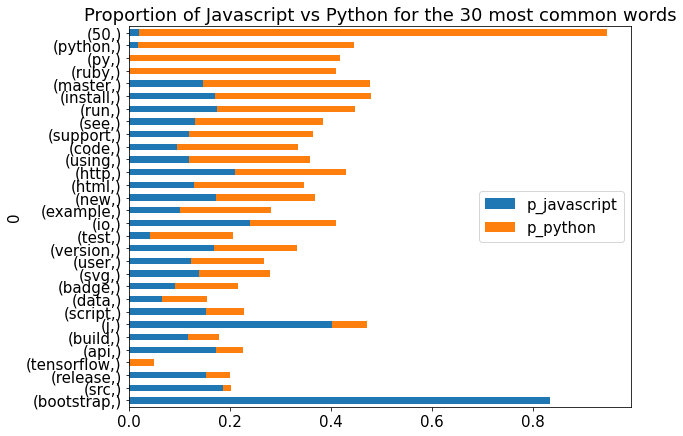

In [21]:
# figure out the percentage of javascript vs python
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python']]
 .tail(30)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Javascript vs Python for the 30 most common words')

Text(0.5, 1.0, 'Proportion of Language for the 20 most common words')

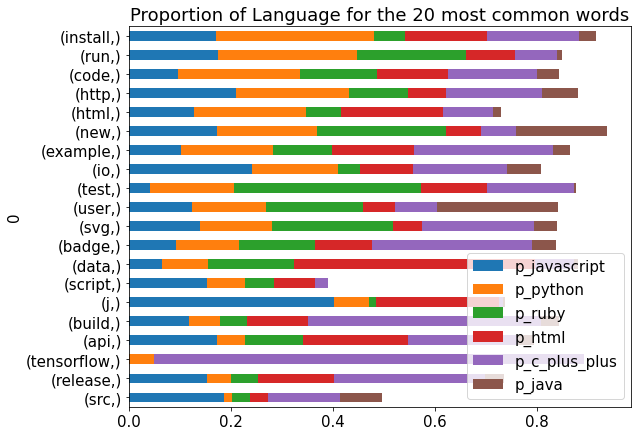

In [22]:
# figure out the percentage of language
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_ruby=word_counts.ruby / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
         p_c_plus_plus=word_counts.c_plus_plus / word_counts['all'],
         p_java=word_counts.java / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python', 'p_ruby', 'p_html', 'p_c_plus_plus', 'p_java']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Language for the 20 most common words')

### Which words show up the most in each language versus all words?

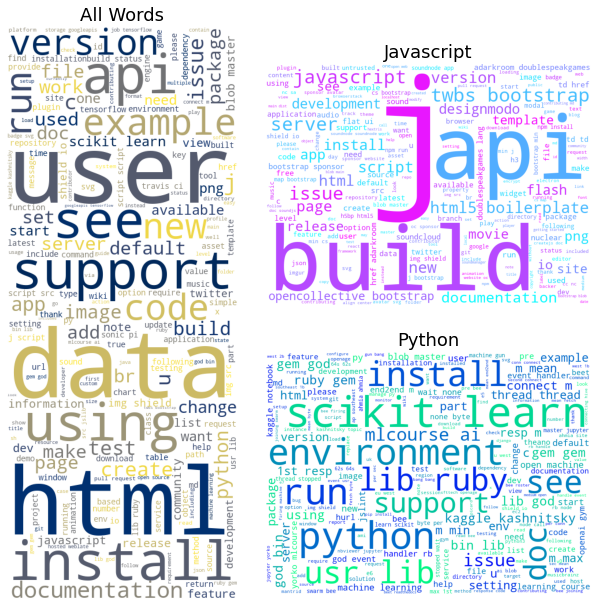

In [23]:
explore.word_cloud_1(all_words, javascript_words, python_words)

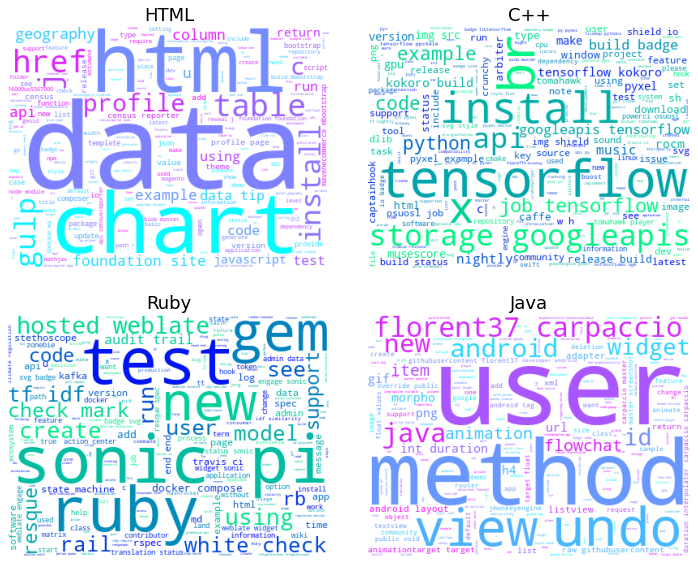

In [24]:
explore.word_cloud_2(html_words, ruby_words, c_plus_plus_words, java_words)

In [25]:
# Extra words to add: ['github', 'project', 'name', 'library']

## Model

In [26]:
from pprint import pprint

## Conclusions and Takeaways

## Add repos

In [32]:
add_repos_df = pd.read_csv("Github_data.csv")
add_repos_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,...,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,...,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,...,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,...,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,...,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,...,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [34]:
df1 = add_repos_df.user
df2 = add_repos_df.name
df1.head()

0          keras-team
1        scikit-learn
2             jakevdp
3    CamDavidsonPilon
4            abhat222
Name: user, dtype: object

In [36]:
add_repos_df = pd.concat([df1 + '/' + df2], axis=1, sort=False)
add_repos_df.head()

,0
0,keras-team/keras
1,scikit-learn/scikit-learn
2,jakevdp/PythonDataScienceHandbook
3,CamDavidsonPilon/Probabilistic-Programming-and...
4,abhat222/Data-Science--Cheat-Sheet


In [47]:
add_repos_list = add_repos_df[0].tolist()
add_repos_list

['keras-team/keras',
 'scikit-learn/scikit-learn',
 'jakevdp/PythonDataScienceHandbook',
 'CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers',
 'abhat222/Data-Science--Cheat-Sheet',
 'donnemartin/data-science-ipython-notebooks',
 'explosion/spaCy',
 'eriklindernoren/ML-From-Scratch',
 'datasciencemasters/go',
 'ipython/ipython',
 'virgili0/Virgilio',
 'academic/awesome-datascience',
 'plotly/dash',
 'ray-project/ray',
 'RaRe-Technologies/gensim',
 'rasbt/python-machine-learning-book',
 'afshinea/stanford-cs-229-machine-learning',
 'hangtwenty/dive-into-machine-learning',
 'bharathgs/Awesome-pytorch-list',
 'tflearn/tflearn',
 'onurakpolat/awesome-bigdata',
 'allenai/allennlp',
 'php-ai/php-ml',
 'streamlit/streamlit',
 'ricklamers/gridstudio',
 'lexfridman/mit-deep-learning',
 'ossu/data-science',
 'OpenRefine/OpenRefine',
 'microsoft/recommenders',
 'EpistasisLab/tpot',
 'FavioVazquez/ds-cheatsheets',
 'Yorko/mlcourse.ai',
 'microsoft/nni',
 'rasbt/python-mac